# Initialize

In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import math

2024-05-28 21:17:05.786832: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-05-28 21:17:05.786854: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-05-28 21:17:05.786861: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-05-28 21:17:05.787276: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-28 21:17:05.787458: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
import classy_sz
classy_sz.__file__

'/Users/boris/opt/miniconda3/lib/python3.9/site-packages/classy_sz-2.9.4-py3.9-macosx-11.0-arm64.egg/classy_sz.cpython-39-darwin.so'

In [16]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = [8.0,8.0]


# a simple conversion from cl's to dl's
def l_to_dl(lp):
    return lp*(lp+1.)/2./np.pi


Omegam0 = 0.3075
H0 = 67.74
Omegab = 0.0486
Omegac = 0.2589
Omegac + Omegab
omega_b = Omegab*(H0/100.)**2
omega_c = Omegac*(H0/100.)**2
hparam = H0/100.
maniyar_cosmo = {
'omega_b': omega_b,
'omega_cdm':  omega_c,
'h': H0/100.,
# 'tau_reio': 0.0561,
'ln10^{10}A_s': 3.048,
'n_s': 0.9665,
# 'sigma8':0.830,
'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.0
}

In [17]:
import os
os.chdir('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/maniyar_cib_benchmark/')
# os.chdir('../../class_sz_auxiliary_files/maniyar_cib_benchmark/')

In [18]:
os.getcwd()

'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/maniyar_cib_benchmark'

In [19]:
from headers_constants import *
from Cell_cib import *
from Cell_tSZ import *
from Cell_CIBxtSZ import *
from plot_cell import *
from input_var import *

computing class_sz:
finnished class_sz hmf computation
len logmasses in msun: 140
[1.76347719e+01 1.58762674e+01 1.42678201e+01 1.28472349e+01
 1.15592211e+01 1.04071536e+01 9.36576193e+00 8.42799557e+00
 7.58156298e+00 6.82160029e+00 6.13607724e+00 5.52391387e+00
 4.96905308e+00 4.47504375e+00 4.02349183e+00 3.62476447e+00
 3.25919132e+00 2.93594500e+00 2.64157734e+00 2.37846247e+00
 2.14043225e+00 1.92687964e+00 1.73444328e+00 1.56136506e+00
 1.40530660e+00 1.26529891e+00 1.13859236e+00 1.02550859e+00
 9.22484509e-01 8.31241247e-01 7.47810187e-01 6.73825066e-01
 6.06281828e-01 5.46080280e-01 4.91530147e-01 4.42567087e-01
 3.98431048e-01 3.58683242e-01 3.22899071e-01 2.90692842e-01
 2.61621634e-01 2.35576739e-01 2.11937343e-01 1.90898962e-01
 1.71732698e-01 1.54676740e-01 1.39132871e-01 1.25274871e-01
 1.12701533e-01 1.01419275e-01 9.12512015e-02 8.20810087e-02
 7.38419102e-02 6.64048882e-02 5.97156835e-02 5.36979103e-02
 4.82621373e-02 4.34010705e-02 3.89944824e-02 3.50588069e-02
 3.

In [20]:
Planck = {'name': 'Planck',
          'do_cib': 1, 'do_tsz': 1, 'do_cibxtsz': 1,
          'freq_cib': [100., 143., 217., 353., 545., 857.],
          'cc': np.array([1.076, 1.017, 1.119, 1.097, 1.068, 0.995, 0.960]),
          'cc_cibmean': np.array([1.076, 1.017, 1.119, 1.097, 1.068, 0.995, 0.960]),
          'freq_cibmean': np.array([100., 143., 217., 353., 545., 857.]),
          'fc': np.ones(7),
          }
exp = Planck
ell = np.geomspace(10., 5e4, 500)
redshifts = np.loadtxt('data_files/redshifts.txt')
z1 = np.linspace(min(redshifts), max(redshifts), 200)
z = redshifts  # z1  # redshifts

logmass = np.arange(8., 15.00, 0.05)

print('len logmass',len(logmass))
mass = 10**logmass

driver = data_var(exp, mass, z, ell)

len logmass 140
self.Meffmax, self.etamax, self.sigmaMh, self.tau 5343720687478.39 0.5125729451033255 1.2483363577298514 0.82547528668862
Calculating the halo mass function, halo bias, nfw profile for given mass and redshift for CIB calculations.
---------  computing stuuff at z =  0.012
(140, 500, 210)
---------  computing stuuff at z =  0.023
(140, 500, 210)
---------  computing stuuff at z =  0.035
(140, 500, 210)
---------  computing stuuff at z =  0.047
(140, 500, 210)
---------  computing stuuff at z =  0.059
(140, 500, 210)
---------  computing stuuff at z =  0.072
(140, 500, 210)
---------  computing stuuff at z =  0.084
(140, 500, 210)
---------  computing stuuff at z =  0.096
(140, 500, 210)
---------  computing stuuff at z =  0.109
(140, 500, 210)
---------  computing stuuff at z =  0.122
(140, 500, 210)
---------  computing stuuff at z =  0.135
(140, 500, 210)
---------  computing stuuff at z =  0.148
(140, 500, 210)
---------  computing stuuff at z =  0.161
(140, 500, 210)

In [21]:
clcib = cl_cib(driver)
cl1h_cib = clcib.onehalo_int()
cl2h_cib = clcib.twohalo_int()

etamax and Meffmax
0.5125729451033255 5343720687478.39
color correction in 1halo: [1. 1. 1. 1. 1. 1.]
us in one halo [[[9.99999830e-01 9.99999953e-01 9.99999979e-01 ... 1.00000000e+00
   1.00000000e+00 1.00000000e+00]
  [9.99999824e-01 9.99999951e-01 9.99999978e-01 ... 1.00000000e+00
   1.00000000e+00 1.00000000e+00]
  [9.99999818e-01 9.99999949e-01 9.99999978e-01 ... 1.00000000e+00
   1.00000000e+00 1.00000000e+00]
  ...
  [1.81401807e-01 3.87329717e-01 6.28878648e-01 ... 9.99742218e-01
   9.99743682e-01 9.99745119e-01]
  [1.77837409e-01 3.77738513e-01 6.19470147e-01 ... 9.99733268e-01
   9.99734782e-01 9.99736270e-01]
  [1.74131477e-01 3.68313674e-01 6.09937674e-01 ... 9.99724007e-01
   9.99725573e-01 9.99727113e-01]]

 [[9.99999816e-01 9.99999949e-01 9.99999978e-01 ... 1.00000000e+00
   1.00000000e+00 1.00000000e+00]
  [9.99999810e-01 9.99999947e-01 9.99999977e-01 ... 1.00000000e+00
   1.00000000e+00 1.00000000e+00]
  [9.99999803e-01 9.99999945e-01 9.99999976e-01 ... 1.00000000e+00


In [27]:
%%time
M = Class()
M.set({'output':'dndlnM,cib_cib_1h,cib_cib_2h'})
M.set(maniyar_cosmo)
M.set({

'mass function' : 'T08M200c',
'use_maniyar_cib_model':1,

'maniyar_cib_etamax' : 5.12572945e-01,

'maniyar_cib_zc' : 1.5,
'maniyar_cib_tau' : 8.25475287e-01,
'maniyar_cib_fsub' : 0.134*np.log(10.),
'Most_efficient_halo_mass_in_Msun' : 5.34372069e+12,
'Size_of_halo_masses_sourcing_CIB_emission' :  1.5583436676980493,
#for the Lsat tabulation:
'freq_min': 9e1,
'freq_max': 8.57e2,
'dlogfreq' : 0.1,

'concentration parameter':'fixed', # this sets it to 5

'n_z_L_sat' :100,
'n_m_L_sat' :100,
'n_nu_L_sat':100,

'use_nc_1_for_all_halos_cib_HOD': 1,

'sub_halo_mass_function' : 'TW10',#'JvdB14',
'M_min_subhalo_in_Msun' : 1e5, # 1e5 see https://github.com/abhimaniyar/halomodel_cib_tsz_cibxtsz/blob/master/Cell_cib.py
'use_redshift_dependent_M_min': 0,
'M_min' : 1e8*hparam,
'M_max' : 1e15*hparam,
'z_min' : 0.012,
'z_max' : 10.,
'ell_min': 10.,
'ell_max':5e4,
'dlogell':0.3,


'ndim_redshifts': 210,
'ndim_masses':150,

'has_cib_flux_cut': 0,
'hm_consistency':0,

'epsabs_L_sat': 1e-40,
'epsrel_L_sat': 1e-9,
    
'damping_1h_term':0,

# "P_k_max_1/Mpc": 50.,
# 'k_max_for_pk_class_sz':50.
})

M.set({
       'cib_frequency_list_num' : 6,
       'cib_frequency_list_in_GHz' : '100,143,217,353,545,857',
      })
M.compute()

CPU times: user 5min 38s, sys: 1.24 s, total: 5min 39s
Wall time: 38.7 s


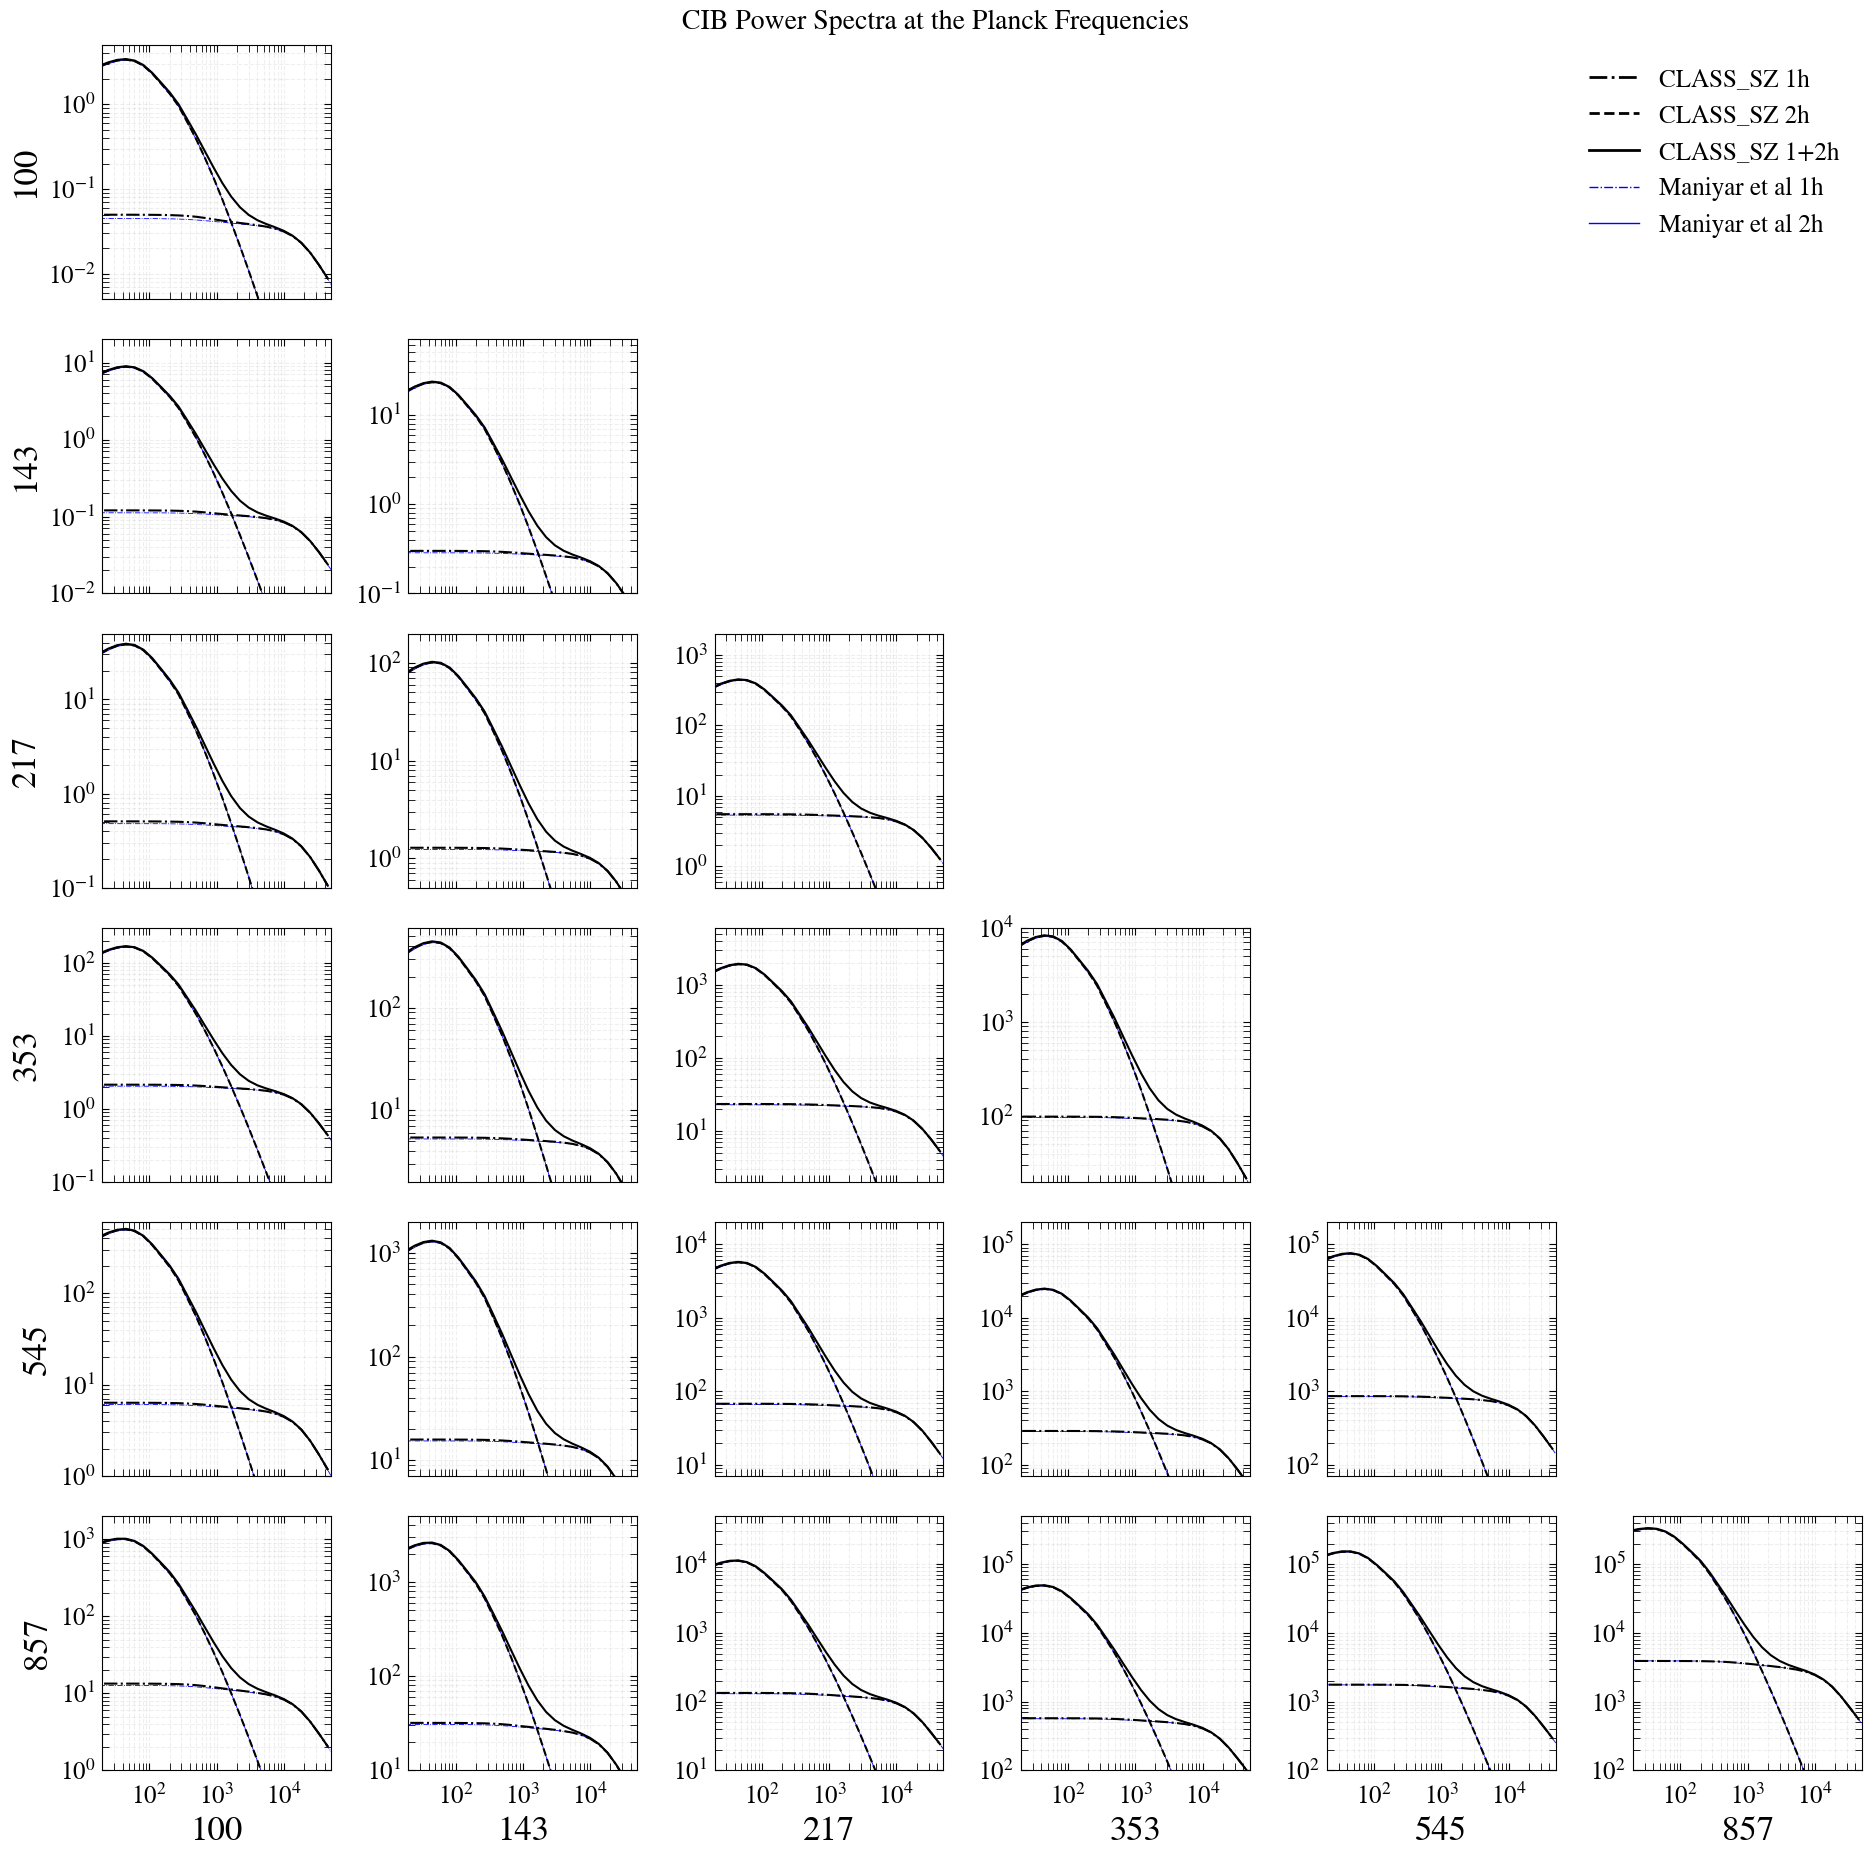

In [28]:
from matplotlib.lines import Line2D
cl_cib_cib = M.cl_cib_cib()
freq = ['100', '143', '217', '353', '545', '857']
# freq = ['545']
# nu1, nu2 = 4, 4
# plot_Cell(ell, cl1h_cib, cl2h_cib, nu1, nu2, freq, 'CIB')
two_halo = cl2h_cib
one_halo = cl1h_cib
faccib = 1.

# plot_dim = int(1/2*(-1 + np.sqrt(1 + 8*len(freq))))
plot_dim = len(freq)
fig, axes = plt.subplots(figsize=(19, 19),
                         sharex=True,
                         #sharey=True,
                         ncols=plot_dim,
                         nrows=plot_dim)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.0,
                    hspace=0.0)

for i in range(plot_dim):
    for j in range(plot_dim):
        if i==0 and j==(plot_dim-1):
            ax = axes[i, j]
            custom_lines = [Line2D([0], [0], color='k', lw=2,ls='-.'),
                            Line2D([0], [0], color='k', lw=2,ls='--'),
                             Line2D([0], [0], color='k', lw=2,ls='-'),
                            Line2D([0], [0], color='b', lw=1,ls='-.'),
                            Line2D([0], [0], color='b', lw=1,ls='-')]
            ax.legend(custom_lines, ['CLASS_SZ 1h', 'CLASS_SZ 2h','CLASS_SZ 1+2h', 'Maniyar et al 1h','Maniyar et al 2h'],
                      fontsize=18,frameon=False)
            # ax.legend()
            ax.axis('off')
        elif i<j:
            axes[i, j].axis('off')
        else:
            ax = axes[i, j]
            freqs = freq[i]
            freqsp = freq[j]
            nu1 = i
            nu2 = j
            faccib = Planck['cc'][i]*Planck['cc'][j]
            # ax.set_title(freqs+'x'+freqsp,size=9)
            if j==0:
                # ax.set_ylabel(r'$\mathrm{C_l}\: [\mathrm{Jy}^2\: \mathrm{sr}^{-1}]$', fontsize=12)
                ax.set_ylabel(freqs, fontsize=25)
            if i==(plot_dim-1):
                # ax.set_xlabel(r'$\;\ell$', fontsize=12)
                ax.set_xlabel(freqsp, fontsize=25)
            ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
            ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
            ax.xaxis.set_ticks_position('both')
            ax.yaxis.set_ticks_position('both')
            plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=18)
            plt.setp(ax.get_xticklabels(), fontsize=18)
            ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
            ax.plot(ell, np.abs(one_halo[nu1, nu2, :])*faccib, 'b-.', label='Maniyar et al 1h',lw=0.6)
            ax.plot(ell, np.abs(two_halo[nu1, nu2, :])*faccib, 'b-', label='Maniyar et al 2h',lw=0.6)
            # ax.plot(ell, np.abs(total[nu1, nu2, :]), 'b', label='total')
            l = np.asarray(cl_cib_cib[freqs+'x'+freqs]['ell'])
            ax.plot(l,cl_cib_cib[freqs+'x'+freqsp]['1h']/l_to_dl(l)*faccib+cl_cib_cib[freqs+'x'+freqsp]['2h']/l_to_dl(l)*faccib*0.,ls='-.',c='k',label='class_sz 1h ')
            ax.plot(l,cl_cib_cib[freqs+'x'+freqsp]['1h']/l_to_dl(l)*faccib*0.+cl_cib_cib[freqs+'x'+freqsp]['2h']/l_to_dl(l)*faccib,ls='--',c='k',label='class_sz 2h ')
            ax.plot(l,cl_cib_cib[freqs+'x'+freqsp]['1h']/l_to_dl(l)*faccib+cl_cib_cib[freqs+'x'+freqsp]['2h']/l_to_dl(l)*faccib,ls='-',c='k',label='class_sz 1+2h ')

            ax.set_xscale("log")
            ax.set_yscale("log")
            ax.set_xlim(20,50000)
            if freqs=='100' and freqsp=='100':
                ax.set_ylim(5e-3,5)
            if freqs=='143' and freqsp=='100':
                ax.set_ylim(1e-2,2e1)
            if freqs=='217' and freqsp=='100':
                ax.set_ylim(1e-1,5e1)
            if freqs=='353' and freqsp=='100':
                ax.set_ylim(1e-1,3e2)
            if freqs=='545' and freqsp=='100':
                ax.set_ylim(1e0,6e2)
            if freqs=='857' and freqsp=='100':
                ax.set_ylim(1e0,2e3)
                
            if freqs=='143' and freqsp=='143':
                ax.set_ylim(1e-1,7e1)
            if freqs=='217' and freqsp=='143':
                ax.set_ylim(5e-1,2e2)
            if freqs=='353' and freqsp=='143':
                ax.set_ylim(2e0,6e2)
            if freqs=='545' and freqsp=='143':
                ax.set_ylim(7e0,2e3)
            if freqs=='857' and freqsp=='143':
                ax.set_ylim(1e1,5e3)
                

            if freqs=='217' and freqsp=='217':
                ax.set_ylim(5e-1,2e3)
            if freqs=='353' and freqsp=='217':
                ax.set_ylim(2e0,6e3)
            if freqs=='545' and freqsp=='217':
                ax.set_ylim(7e0,2e4)
            if freqs=='857' and freqsp=='217':
                ax.set_ylim(1e1,5e4)


            if freqs=='353' and freqsp=='353':
                ax.set_ylim(2e1,1e4)
            if freqs=='545' and freqsp=='353':
                ax.set_ylim(7e1,2e5)
            if freqs=='857' and freqsp=='353':
                ax.set_ylim(1e2,5e5)
                
            if freqs=='545' and freqsp=='545':
                ax.set_ylim(7e1,2e5)
            if freqs=='857' and freqsp=='545':
                ax.set_ylim(1e2,5e5)
                
            if freqs=='857' and freqsp=='857':
                ax.set_ylim(1e2,5e5)
fig.suptitle('CIB Power Spectra at the Planck Frequencies',fontsize=20)
fig.tight_layout()

# plt.savefig('maniyar_benchmark.pdf')

Note: the slight mismatch at low-l and 100GHz can be fixed by chosing linear interpolation of Snu. Which yielded the plot below. 

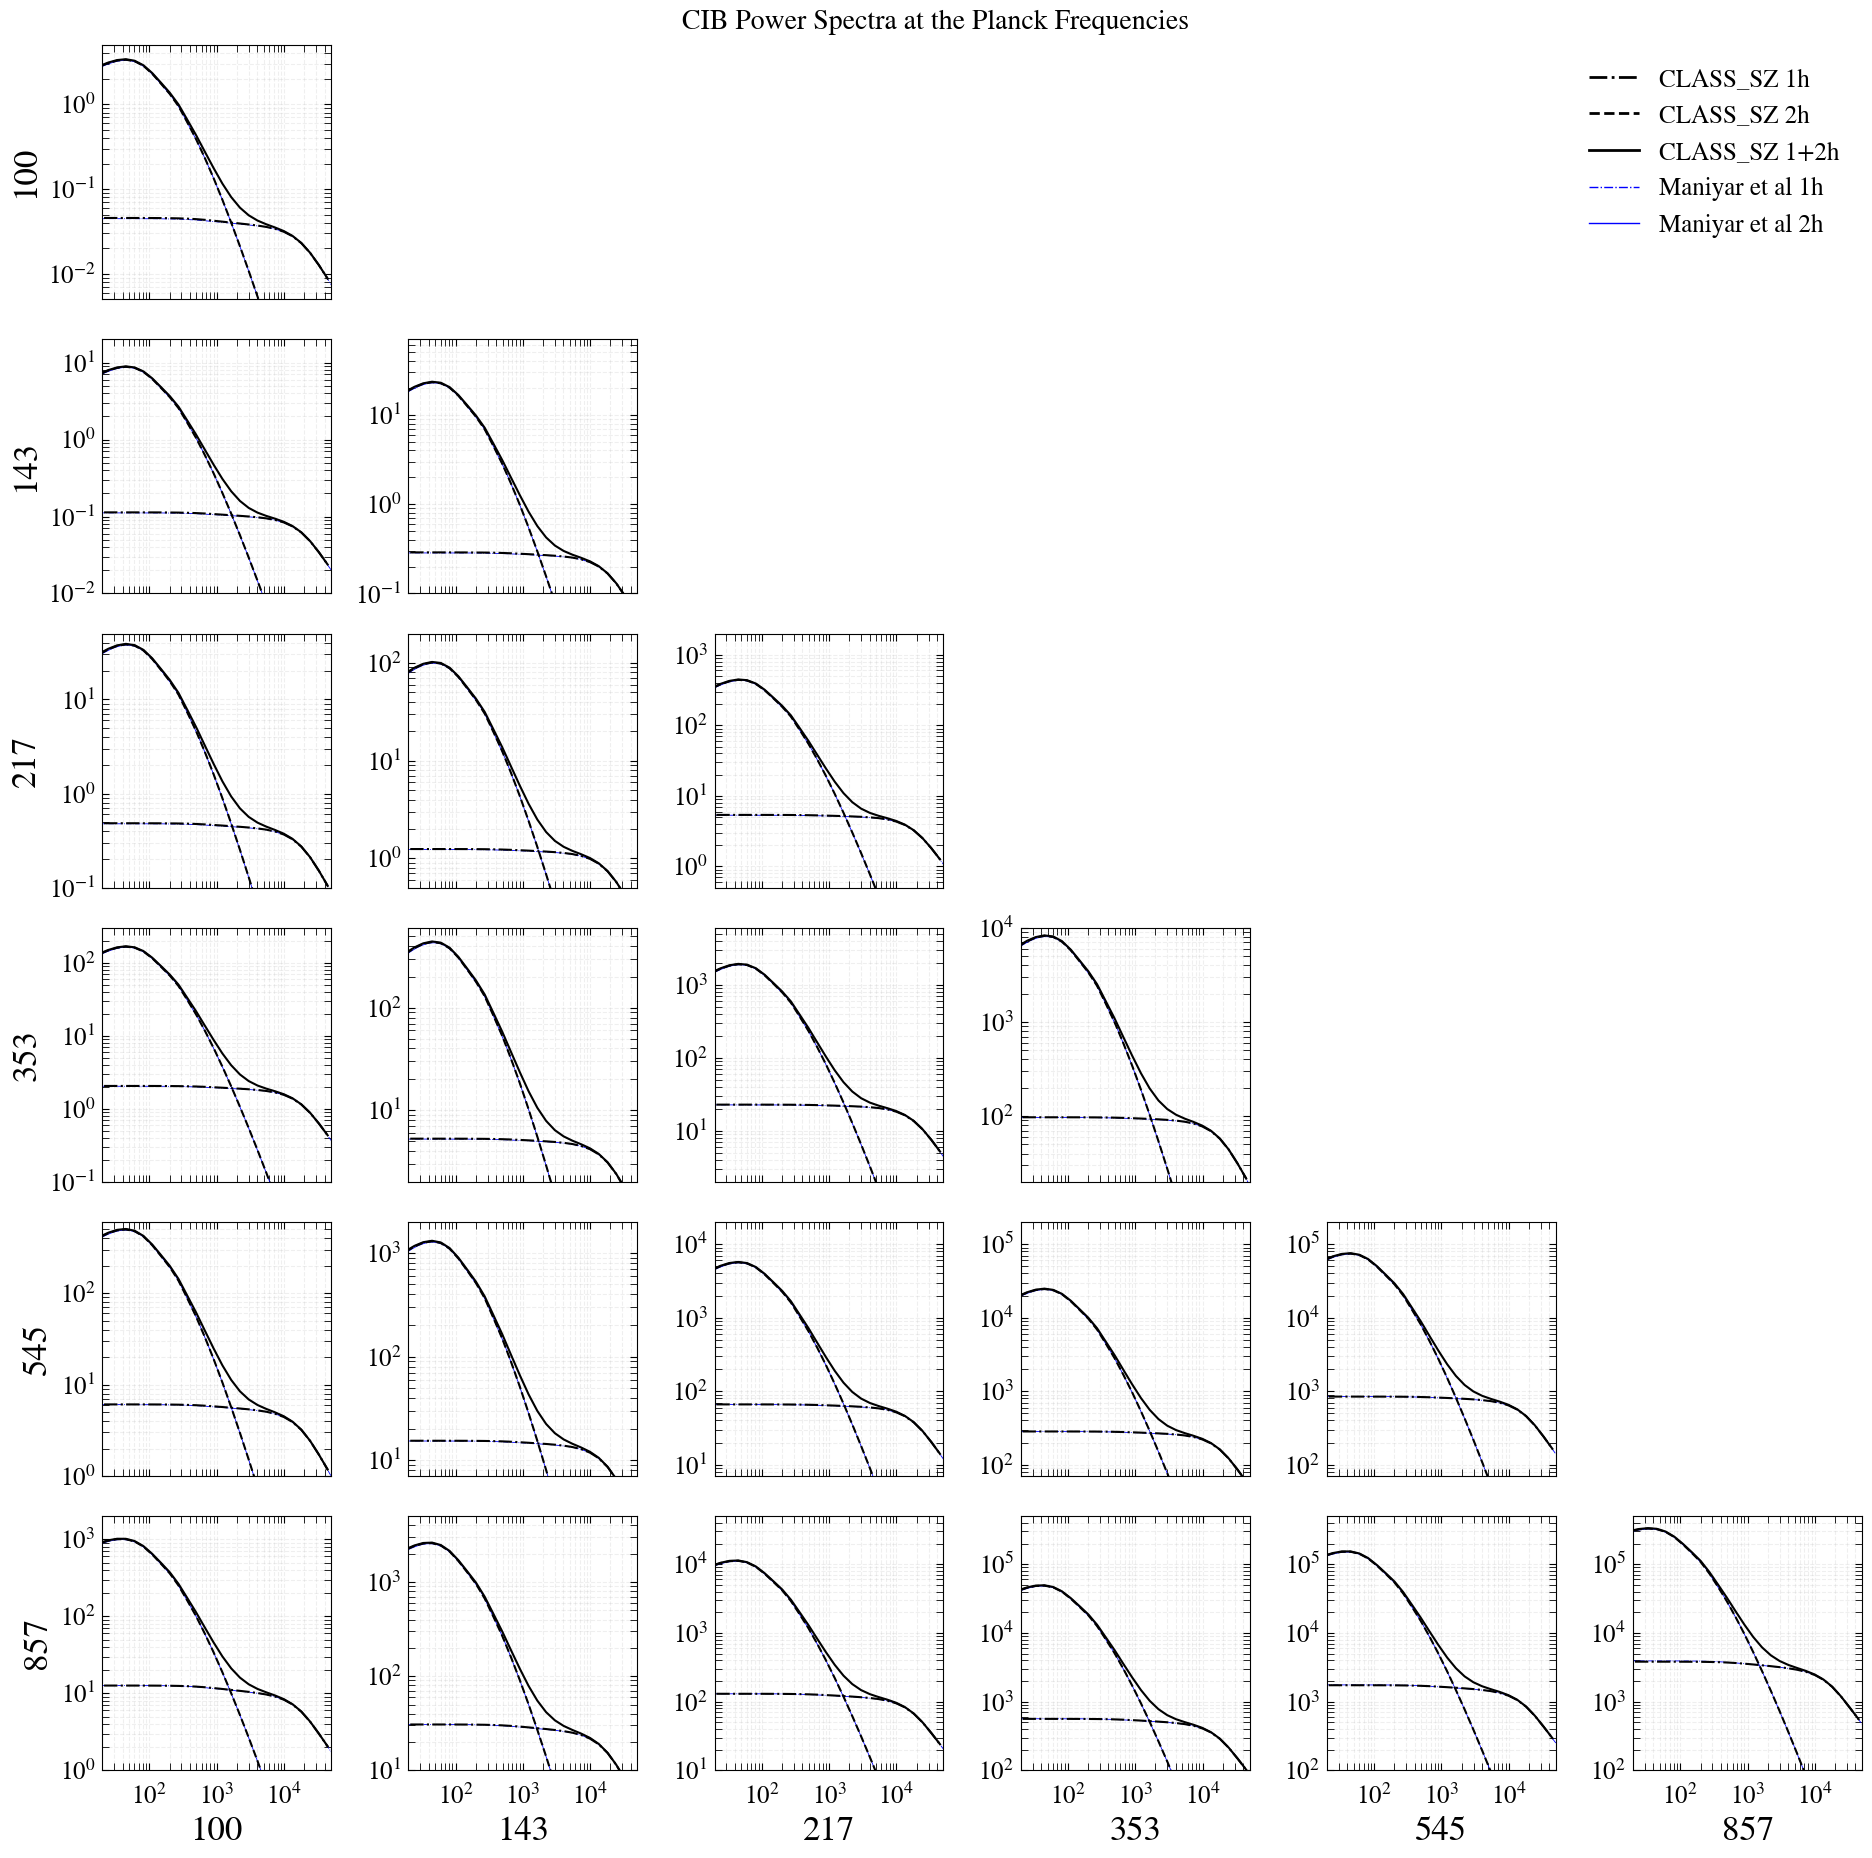

In [16]:
from matplotlib.lines import Line2D
cl_cib_cib = M.cl_cib_cib()
freq = ['100', '143', '217', '353', '545', '857']
# freq = ['545']
# nu1, nu2 = 4, 4
# plot_Cell(ell, cl1h_cib, cl2h_cib, nu1, nu2, freq, 'CIB')
two_halo = cl2h_cib
one_halo = cl1h_cib
faccib = 1.

# plot_dim = int(1/2*(-1 + np.sqrt(1 + 8*len(freq))))
plot_dim = len(freq)
fig, axes = plt.subplots(figsize=(19, 19),
                         sharex=True,
                         #sharey=True,
                         ncols=plot_dim,
                         nrows=plot_dim)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.0,
                    hspace=0.0)

for i in range(plot_dim):
    for j in range(plot_dim):
        if i==0 and j==(plot_dim-1):
            ax = axes[i, j]
            custom_lines = [Line2D([0], [0], color='k', lw=2,ls='-.'),
                            Line2D([0], [0], color='k', lw=2,ls='--'),
                             Line2D([0], [0], color='k', lw=2,ls='-'),
                            Line2D([0], [0], color='b', lw=1,ls='-.'),
                            Line2D([0], [0], color='b', lw=1,ls='-')]
            ax.legend(custom_lines, ['CLASS_SZ 1h', 'CLASS_SZ 2h','CLASS_SZ 1+2h', 'Maniyar et al 1h','Maniyar et al 2h'],
                      fontsize=18,frameon=False)
            # ax.legend()
            ax.axis('off')
        elif i<j:
            axes[i, j].axis('off')
        else:
            ax = axes[i, j]
            freqs = freq[i]
            freqsp = freq[j]
            nu1 = i
            nu2 = j
            faccib = Planck['cc'][i]*Planck['cc'][j]
            # ax.set_title(freqs+'x'+freqsp,size=9)
            if j==0:
                # ax.set_ylabel(r'$\mathrm{C_l}\: [\mathrm{Jy}^2\: \mathrm{sr}^{-1}]$', fontsize=12)
                ax.set_ylabel(freqs, fontsize=25)
            if i==(plot_dim-1):
                # ax.set_xlabel(r'$\;\ell$', fontsize=12)
                ax.set_xlabel(freqsp, fontsize=25)
            ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
            ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
            ax.xaxis.set_ticks_position('both')
            ax.yaxis.set_ticks_position('both')
            plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=18)
            plt.setp(ax.get_xticklabels(), fontsize=18)
            ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
            ax.plot(ell, np.abs(one_halo[nu1, nu2, :])*faccib, 'b-.', label='Maniyar et al 1h',lw=0.6)
            ax.plot(ell, np.abs(two_halo[nu1, nu2, :])*faccib, 'b-', label='Maniyar et al 2h',lw=0.6)
            # ax.plot(ell, np.abs(total[nu1, nu2, :]), 'b', label='total')
            l = np.asarray(cl_cib_cib[freqs+'x'+freqs]['ell'])
            ax.plot(l,cl_cib_cib[freqs+'x'+freqsp]['1h']/l_to_dl(l)*faccib+cl_cib_cib[freqs+'x'+freqsp]['2h']/l_to_dl(l)*faccib*0.,ls='-.',c='k',label='class_sz 1h ')
            ax.plot(l,cl_cib_cib[freqs+'x'+freqsp]['1h']/l_to_dl(l)*faccib*0.+cl_cib_cib[freqs+'x'+freqsp]['2h']/l_to_dl(l)*faccib,ls='--',c='k',label='class_sz 2h ')
            ax.plot(l,cl_cib_cib[freqs+'x'+freqsp]['1h']/l_to_dl(l)*faccib+cl_cib_cib[freqs+'x'+freqsp]['2h']/l_to_dl(l)*faccib,ls='-',c='k',label='class_sz 1+2h ')

            ax.set_xscale("log")
            ax.set_yscale("log")
            ax.set_xlim(20,50000)
            if freqs=='100' and freqsp=='100':
                ax.set_ylim(5e-3,5)
            if freqs=='143' and freqsp=='100':
                ax.set_ylim(1e-2,2e1)
            if freqs=='217' and freqsp=='100':
                ax.set_ylim(1e-1,5e1)
            if freqs=='353' and freqsp=='100':
                ax.set_ylim(1e-1,3e2)
            if freqs=='545' and freqsp=='100':
                ax.set_ylim(1e0,6e2)
            if freqs=='857' and freqsp=='100':
                ax.set_ylim(1e0,2e3)
                
            if freqs=='143' and freqsp=='143':
                ax.set_ylim(1e-1,7e1)
            if freqs=='217' and freqsp=='143':
                ax.set_ylim(5e-1,2e2)
            if freqs=='353' and freqsp=='143':
                ax.set_ylim(2e0,6e2)
            if freqs=='545' and freqsp=='143':
                ax.set_ylim(7e0,2e3)
            if freqs=='857' and freqsp=='143':
                ax.set_ylim(1e1,5e3)
                

            if freqs=='217' and freqsp=='217':
                ax.set_ylim(5e-1,2e3)
            if freqs=='353' and freqsp=='217':
                ax.set_ylim(2e0,6e3)
            if freqs=='545' and freqsp=='217':
                ax.set_ylim(7e0,2e4)
            if freqs=='857' and freqsp=='217':
                ax.set_ylim(1e1,5e4)


            if freqs=='353' and freqsp=='353':
                ax.set_ylim(2e1,1e4)
            if freqs=='545' and freqsp=='353':
                ax.set_ylim(7e1,2e5)
            if freqs=='857' and freqsp=='353':
                ax.set_ylim(1e2,5e5)
                
            if freqs=='545' and freqsp=='545':
                ax.set_ylim(7e1,2e5)
            if freqs=='857' and freqsp=='545':
                ax.set_ylim(1e2,5e5)
                
            if freqs=='857' and freqsp=='857':
                ax.set_ylim(1e2,5e5)
fig.suptitle('CIB Power Spectra at the Planck Frequencies',fontsize=20)
fig.tight_layout()

plt.savefig('maniyar_benchmark.pdf')

# Create the Snu files needed - (FOR DEVELOPERS)

In [8]:
# ######### reading and interpolating the SEDs
from astropy.io import fits
import numpy as np
snuaddr = '/Users/boris/Work/CLASS-SZ/SO-SZ/halomodel_cib_tsz_cibxtsz/data_files/filtered_snu_planck.fits'
hdulist = fits.open(snuaddr)
"""
The effective SEDs for the CIB for Planck (100, 143, 217, 353, 545,
857) and
IRAS (3000) GHz frequencies.
Here we are shwoing the CIB power spectra corressponding to the
Planck
frequency channels. If you want to calculate the Hershel/Spire
power spectra, use corresponding files in the data folder.
"""
redshifts = hdulist[1].data
snu_eff = hdulist[0].data  # in Jy/Lsun

# print(hdulist[1].header)

hdulist.close()
# snuinterp = interp1d(redshifts, snu_eff, kind='linear',
#                      bounds_error=False, fill_value=0.)

from scipy.interpolate import interp1d

In [9]:
np.shape(snu_eff)

(7, 210)

In [10]:
lnsnu_eff = np.log(snu_eff) # set to log here!

In [11]:
snuinterpnu = interp1d(np.array([100, 143, 217, 353, 545,857,3000]), lnsnu_eff , kind='linear',axis=0,bounds_error=False, fill_value="extrapolate")

In [12]:
## add a point at 90GHz so we can use it for ACT/SPT
snu90 = snuinterpnu(90)
np.shape(snu90)

(210,)

In [13]:
lnsnu_eff = np.insert(lnsnu_eff,0,snu90,axis=0)

In [15]:
np.shape(lnsnu_eff)

(8, 210)

In [16]:
snuinterp = interp1d(redshifts, lnsnu_eff, kind='linear',
                     bounds_error=False, fill_value="extrapolate")


## add a point at z=0
redshifts = np.insert(redshifts,0,0.)
print(np.shape(redshifts))


snu = snuinterp(0)
lnsnu_eff = np.insert(lnsnu_eff,0,snu,axis=1)

(211,)


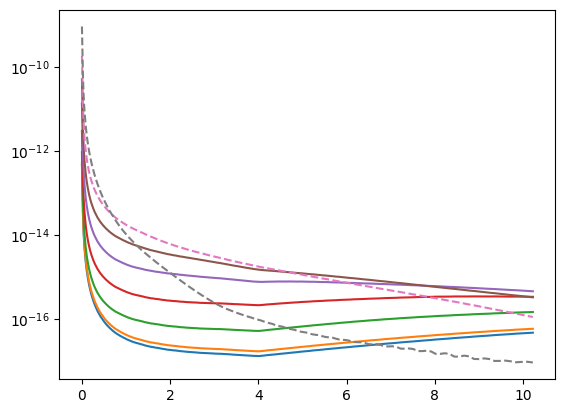

In [19]:
import matplotlib.pyplot as plt
plt.plot(redshifts,np.exp(lnsnu_eff[0,:]))
plt.plot(redshifts,np.exp(lnsnu_eff[1,:]))
plt.plot(redshifts,np.exp(lnsnu_eff[2,:]))
plt.plot(redshifts,np.exp(lnsnu_eff[3,:]))
plt.plot(redshifts,np.exp(lnsnu_eff[4,:]))
plt.plot(redshifts,np.exp(lnsnu_eff[5,:]))
plt.plot(redshifts,np.exp(lnsnu_eff[6,:]),ls='--')
plt.plot(redshifts,np.exp(lnsnu_eff[7,:]),ls='--')
plt.yscale('log')

In [20]:
import scipy
lnsnu2d = scipy.interpolate.RectBivariateSpline(np.array([90.,100., 143., 217., 353., 545.,857.,3000.]), 
                                              redshifts,
                                              lnsnu_eff, bbox=[None, None, None, None], kx=3, ky=3, s=0)

In [22]:
np.exp(lnsnu2d(10123.4,3.4))

array([[1.5214122e-16]])

In [25]:
nu_fine = np.geomspace(90.,3000.,200)
snu_eff_fine = np.zeros((200,211))
for inu,nus in enumerate(nu_fine):
    for izs,zs in enumerate(redshifts):
        snu_eff_fine[inu][izs] = np.exp(lnsnu2d(nus,zs))

In [26]:
# uncomment to save !
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/filtered_snu_planck_fine.txt',snu_eff_fine.transpose())
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/filtered_snu_planck_z_fine.txt',
          np.c_[redshifts])
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/filtered_snu_planck_nu_fine.txt',
          np.c_[nu_fine])

In [27]:
sufine = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/filtered_snu_planck_fine.txt',unpack=True)
# sufine = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/filtered_snu_planck_90_100_143_217_353_545_857_3000.txt',unpack=True)

In [28]:
np.shape(sufine)

(200, 211)

# Extrapolating to higher frequencies

In [8]:
%%time
M = Class()
M.set({'output':'dndlnM,cib_cib_1h,cib_cib_2h,cib_monopole'})
M.set(maniyar_cosmo)
M.set({

'mass function' : 'T08M200c',
'use_maniyar_cib_model':1,

'maniyar_cib_etamax' : 5.12572945e-01,

'maniyar_cib_zc' : 1.5,
'maniyar_cib_tau' : 8.25475287e-01,
'maniyar_cib_fsub' : 0.134*np.log(10.),
'Most_efficient_halo_mass_in_Msun' : 5.34372069e+12,
'Size_of_halo_masses_sourcing_CIB_emission' :  1.5583436676980493,
#for the Lsat tabulation:
'freq_min': 9e1,
'freq_max': 2.5e3,
'dlogfreq' : 0.1,

'concentration parameter':'fixed', # this sets it to 5

'n_z_L_sat' :100,
'n_m_L_sat' :100,
'n_nu_L_sat':500,

'use_nc_1_for_all_halos_cib_HOD': 1,

'sub_halo_mass_function' : 'TW10',#'JvdB14',
'M_min_subhalo_in_Msun' : 1e5, # 1e5 see https://github.com/abhimaniyar/halomodel_cib_tsz_cibxtsz/blob/master/Cell_cib.py
'use_redshift_dependent_M_min': 0,
'M_min' : 1e8*hparam,
'M_max' : 1e15*hparam,
'z_min' : 0.012,
'z_max' : 10.,
'ell_min': 10.,
'ell_max':5e4,
'dlogell':0.3,


'ndim_redshifts': 210,
'ndim_masses':150,

'has_cib_flux_cut': 0,
'hm_consistency':0,

'epsabs_L_sat': 1e-40,
'epsrel_L_sat': 1e-9,
    
'damping_1h_term':0,

# "P_k_max_1/Mpc": 50.,
# 'k_max_for_pk_class_sz':50.
})

M.set({
       'cib_frequency_list_num' : 7,
       'cib_frequency_list_in_GHz' : '100,143,217,353,545,857,2400',
      })
M.compute()

CPU times: user 9min 44s, sys: 2.96 s, total: 9min 47s
Wall time: 1min 11s


In [10]:
def CIB_monopole_Maniyar2021(zmin=0.005, zmax=6., Mmost_eff=10.**12.94):
    '''function to easily compute the halo model CIB monopole based on Maniyar+2021
    (https://arxiv.org/pdf/2006.16329.pdf) 
    using class_sz.
    
    Input:
    zmin: minimum redshift 
    zmax: maximum redshift 
    Mmost_eff: most efficient halo mass in Msun (default: 10.**12.94)
   
    
    Output:
    nu: frequencies [GHz]
    I0: CIB intensity [Jy/sr]
    '''
    
    # the parameters needed for cosmology:
    # use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf) Table 2
    # TT,TE,EE+lowE+lensing+BAO
    cosmo_params = {
    'omega_b': 0.02242,
    'omega_cdm':  0.11933,
    'H0': 67.66, # use H0 because this is what is used by the emulators.
    'tau_reio': 0.0561,
    'ln10^{10}A_s': 3.047,
    'n_s': 0.9665,

    'k_pivot': 0.05,
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06}

    
    Maniyar_CIB={
        'output': 'cib_monopole',
        'mass function' : 'T08M200c',
        'use_maniyar_cib_model':1,
        
        'maniyar_cib_zc' : 1.5,
        'maniyar_cib_tau' : 8.25475287e-01,
        'maniyar_cib_fsub' : 0.134*np.log(10.),
        'Most_efficient_halo_mass_in_Msun' : Mmost_eff,
        'Size_of_halo_masses_sourcing_CIB_emission' :  1.5583436676980493,
        #for the Lsat tabulation+Monopole:
        'freq_min': 9e1,
        'freq_max': 2e3,
        'dlogfreq' : 0.05,
        'concentration parameter':'B13', # this sets it to 5


        'use_nc_1_for_all_halos_cib_HOD': 1,

        'sub_halo_mass_function' : 'TW10',#'JvdB14',
        'M_min_subhalo_in_Msun' : 1e5, # 1e5 see https://github.com/abhimaniyar/halomodel_cib_tsz_cibxtsz/blob/master/Cell_cib.py
        'use_redshift_dependent_M_min': 0,
        'M_min' : 1e8*cosmo_params['H0']/100., # not used
        'M_max' : 1e15*cosmo_params['H0']/100.,
        'z_min' : zmin,
        'z_max' : zmax,
        'hm_consistency':0,
        
        'has_cib_flux_cut': 0}

    
    M = Class()
    M.set(cosmo_params)
    M.set(Maniyar_CIB)
    M.compute()
    
    nu=np.array(M.cib_monopole()['nu'])
    I0=np.array(M.cib_monopole()['I0'])
    
    return nu, I0

In [11]:
%%time
Mhalo_effs=np.array([10.**11])
nu_list_maniyar = []
Inu_list_maniyar = []
for i in range(len(Mhalo_effs)):
    nu, Icib=CIB_monopole_Maniyar2021(Mmost_eff=Mhalo_effs[i])
    nu_list_maniyar.append(nu)
    Inu_list_maniyar.append(Icib)

CPU times: user 1min 8s, sys: 231 ms, total: 1min 8s
Wall time: 8.52 s


CPU times: user 75.9 ms, sys: 8.25 ms, total: 84.2 ms
Wall time: 79.6 ms


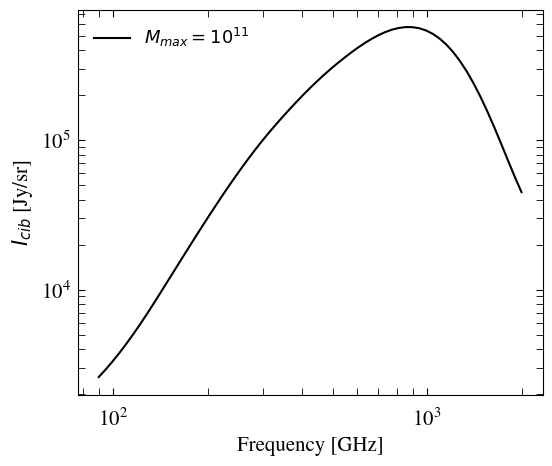

In [15]:
%%time

import matplotlib as mpl
tot_color=12

norm1 = mpl.colors.Normalize(vmin=3, vmax=12)
cmap1 = mpl.cm.ScalarMappable(norm=norm1, cmap=mpl.cm.Oranges)

label_size = 15
title_size = 20
legend_size = 13
handle_length = 1.5
fig, ax2 = plt.subplots(1,1, figsize=(6,5))



ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax2.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
plt.setp(ax2.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax2.get_xticklabels(), fontsize=label_size)
# ax2.grid( visible=True, which="both", alpha=1.2, linestyle='--')
ax2.set_xlabel(r'Frequency [GHz]', fontsize=label_size)
ax2.set_ylabel(r'$I_{cib}$ [Jy/sr]', fontsize=label_size)
# ax2.text(300, 3000, 'Maniyar et al. 2020', style='italic')
for i in range(len(Mhalo_effs)):

    nu, Icib=nu_list_maniyar[i],Inu_list_maniyar[i]
    ax2.plot(nu, Icib, label=r"$M_{max} = 10^{%d}$"%(int(np.log10(Mhalo_effs[i]))), c= 'k')# c=cmap1.to_rgba(i*2+5))
    #ax2.plot(nu, Icib, label=r"$z_{max}=$"+str(Mhalo_effs[i]), c='black')
    
ax2.legend(fontsize=legend_size,frameon=False)
# plt.savefig('figures/CIB_monopole_Maniya2021.pdf')